In [1]:
import pandas as pd

In [11]:
data_hedonic = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Total_Features_HedNew.csv')

data_hedonic_per = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Hedonic_perfume.csv')
data_utilitarian = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Total_Features_utilitarian.csv')



In [19]:
data_hedonic = data_hedonic[~data_hedonic['product'].isin(['Hair Treatment','Heat Protector'])]


In [21]:
# List of parent ASIN values to be deleted
asin_to_delete = ['B00WXP607C', 'B0BLGN9N39']

# Filtering the DataFrame to exclude rows with specified parent ASIN values
data_hedonic = data_hedonic[~data_hedonic['parent_asin'].isin(asin_to_delete)]


In [23]:
data_combined = pd.concat([data_hedonic, data_hedonic_per], ignore_index=True)

data_combined.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Total_Features_HedonicNew.csv', index=False)

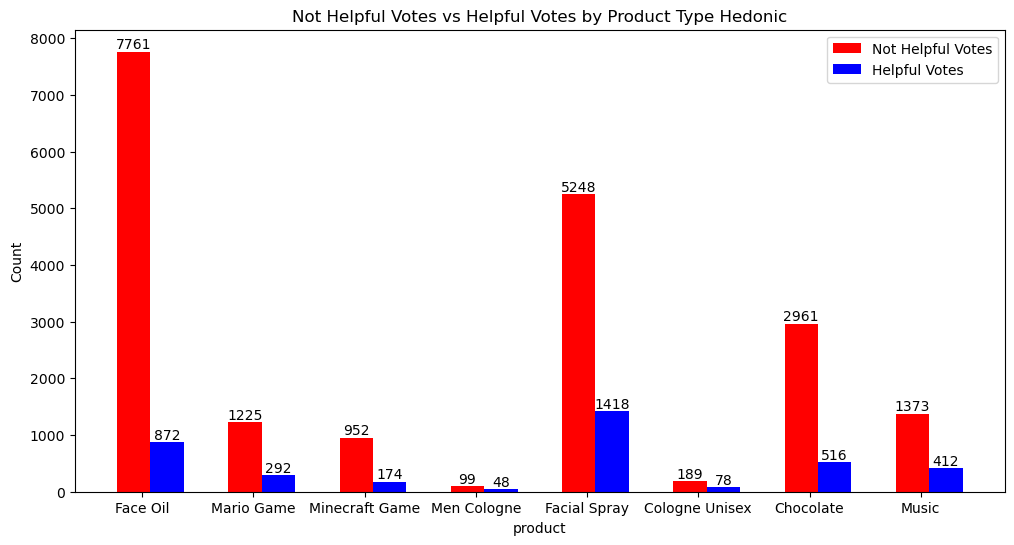

In [15]:
import matplotlib.pyplot as plt

# Assuming data_hedonic is your DataFrame

# Get unique product types
product_types = data_hedonic['product'].unique()

# Initialize lists to store counts
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each product type
for product_type in product_types:
    # Count of rows where helpful votes are zero for the current product type
    not_helpful_votes_count = data_hedonic[(data_hedonic['product'] == product_type) & (data_hedonic['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current product type
    helpful_votes_count = data_hedonic[(data_hedonic['product'] == product_type) & (data_hedonic['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)

# Create stacked bar chart
plt.figure(figsize=(12, 6))

# Plotting the stacked bar chart
index = range(len(product_types))
bar_width = 0.3

plt.bar(index, not_helpful_votes_counts, bar_width, color='red', label='Not Helpful Votes')
plt.bar([i + bar_width for i in index], helpful_votes_counts, bar_width, color='blue', label='Helpful Votes')

# Adding counts on top of each bar for not helpful votes
for i, count in enumerate(not_helpful_votes_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black')

# Adding counts on top of each bar for helpful votes
for i, count in enumerate(helpful_votes_counts):
    plt.text(i + bar_width, count + 0.1, str(count), ha='center', va='bottom', color='black')

plt.xlabel('product')
plt.ylabel('Count')
plt.title('Not Helpful Votes vs Helpful Votes by Product Type Hedonic')
plt.xticks([i + bar_width/4 for i in index], product_types)
plt.legend()

# Display the plot
plt.show()


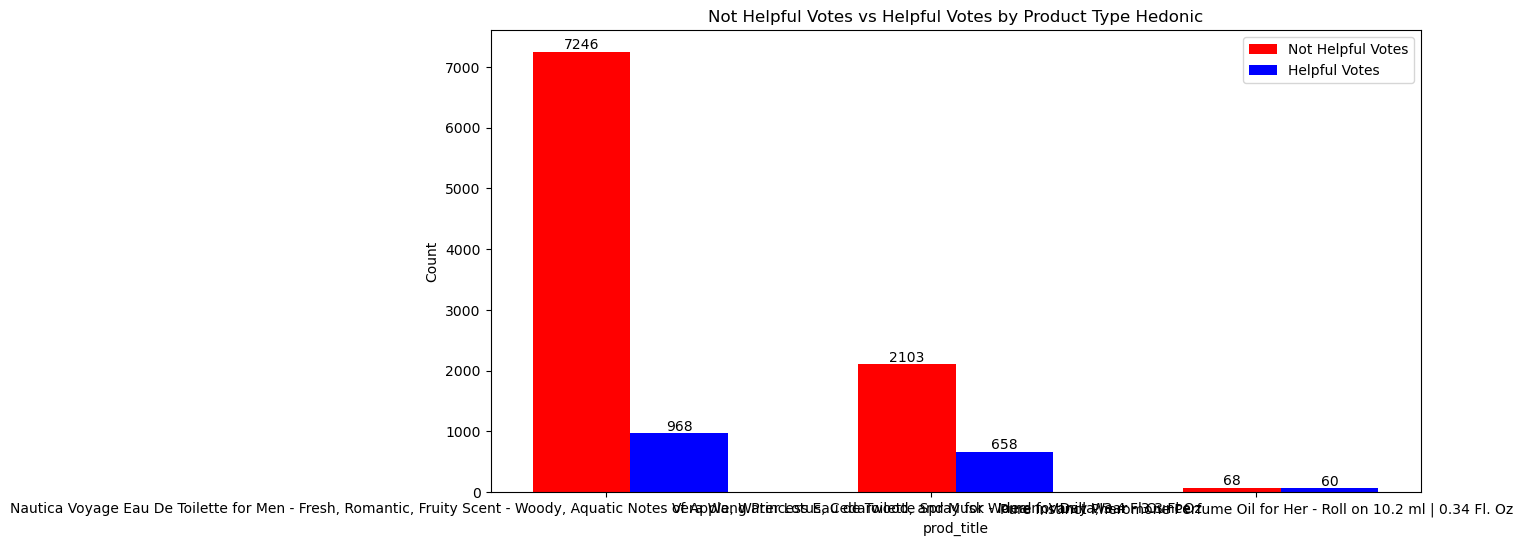

In [18]:
# Assuming data_hedonic is your DataFrame

# Get unique product types
product_types = data_hedonic_per['prod_title'].unique()

# Initialize lists to store counts
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each product type
for product_type in product_types:
    # Count of rows where helpful votes are zero for the current product type
    not_helpful_votes_count = data_hedonic_per[(data_hedonic_per['prod_title'] == product_type) & (data_hedonic_per['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current product type
    helpful_votes_count = data_hedonic_per[(data_hedonic_per['prod_title'] == product_type) & (data_hedonic_per['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)

# Create stacked bar chart
plt.figure(figsize=(12, 6))

# Plotting the stacked bar chart
index = range(len(product_types))
bar_width = 0.3

plt.bar(index, not_helpful_votes_counts, bar_width, color='red', label='Not Helpful Votes')
plt.bar([i + bar_width for i in index], helpful_votes_counts, bar_width, color='blue', label='Helpful Votes')

# Adding counts on top of each bar for not helpful votes
for i, count in enumerate(not_helpful_votes_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black')

# Adding counts on top of each bar for helpful votes
for i, count in enumerate(helpful_votes_counts):
    plt.text(i + bar_width, count + 0.1, str(count), ha='center', va='bottom', color='black')

plt.xlabel('prod_title')
plt.ylabel('Count')
plt.title('Not Helpful Votes vs Helpful Votes by Product Type Hedonic')
plt.xticks([i + bar_width/4 for i in index], product_types)
plt.legend()

# Display the plot
plt.show()


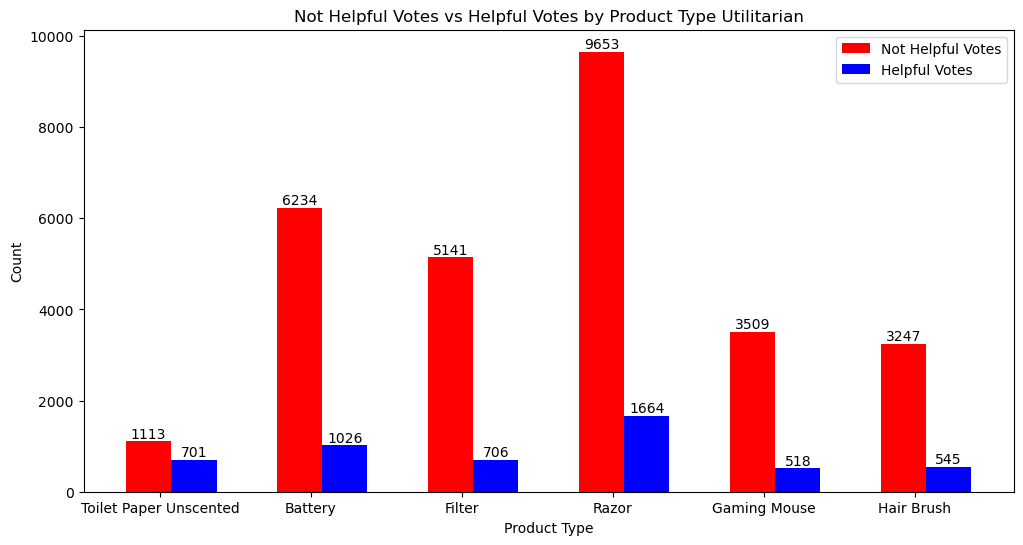

In [27]:
import matplotlib.pyplot as plt

# Assuming data_hedonic is your DataFrame

# Get unique product types
product_types = data_utilitarian['product'].unique()

# Initialize lists to store counts
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each product type
for product_type in product_types:
    # Count of rows where helpful votes are zero for the current product type
    not_helpful_votes_count = data_utilitarian[(data_utilitarian['product'] == product_type) & (data_utilitarian['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current product type
    helpful_votes_count = data_utilitarian[(data_utilitarian['product'] == product_type) & (data_utilitarian['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)

# Create stacked bar chart
plt.figure(figsize=(12, 6))

# Plotting the stacked bar chart
index = range(len(product_types))
bar_width = 0.3

plt.bar(index, not_helpful_votes_counts, bar_width, color='red', label='Not Helpful Votes')
plt.bar([i + bar_width for i in index], helpful_votes_counts, bar_width, color='blue', label='Helpful Votes')

# Adding counts on top of each bar for not helpful votes
for i, count in enumerate(not_helpful_votes_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black')

# Adding counts on top of each bar for helpful votes
for i, count in enumerate(helpful_votes_counts):
    plt.text(i + bar_width, count + 0.1, str(count), ha='center', va='bottom', color='black')

plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Not Helpful Votes vs Helpful Votes by Product Type Utilitarian')
plt.xticks([i + bar_width/4 for i in index], product_types)
plt.legend()

# Display the plot
plt.show()


In [13]:
import pandas as pd

# Get unique product types
product_types = data_utilitarian['product'].unique()

# Initialize lists to store counts and products
products = []
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each product type
for product_type in product_types:
    # Count of rows where helpful votes are zero for the current product type
    not_helpful_votes_count = data_utilitarian[(data_utilitarian['product'] == product_type) & (data_utilitarian['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current product type
    helpful_votes_count = data_utilitarian[(data_utilitarian['product'] == product_type) & (data_utilitarian['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)
    
    # Append product type to the list for DataFrame creation
    products.append(product_type)

# Calculate percentage of helpful votes
total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

# Create DataFrame to store counts with product types
counts_df = pd.DataFrame({
    'Product': products,
    'Not Helpful Votes': not_helpful_votes_counts,
    'Helpful Votes': helpful_votes_counts,
    'Helpful Votes Percentage': helpful_vote_percentages
})

# Display the DataFrame
print(counts_df)



                  Product  Not Helpful Votes  Helpful Votes  \
0  Toilet Paper Unscented               1113            701   
1                 Battery               6234           1026   
2                  Filter               5141            706   
3                   Razor               9653           1664   
4            Gaming Mouse               3509            518   
5              Hair Brush               3247            545   

   Helpful Votes Percentage  
0                 38.643881  
1                 14.132231  
2                 12.074568  
3                 14.703543  
4                 12.863174  
5                 14.372363  
